In [1]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#生成線性資料
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2)) #從[0, 1]取出
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

#生成XOR資料
def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
        
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
    
    return np.array(inputs), np.array(labels).reshape(21, 1)

#把結果列印出來
def show_result(x, y, pred_y):
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if round(float(pred_y[i])) == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()

#準確率計算    
def accuracy(x, y, n):
    total = 0
    for i in range(len(x)):
        bias = x[i] - y[i]
        total += abs(bias)
    return 1 - float(total / n)

In [3]:
#建立NN framework
class Neural_Network(object):
    def __init__(self):
        #各layer大小設定
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        #初始權重(這邊這樣設計是為了讓其遵守行列式乘法規則左邊矩陣n行=右邊矩陣m列)
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) 
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) 

    def forward(self, x):

        self.z1 = np.dot(x, self.W1) 
        self.z2 = self.sigmoid(self.z1) 
        self.z = np.dot(self.z2, self.W2) 
        output = self.sigmoid(self.z) 
        return output 

    def sigmoid(self, x):
        # 激勵函數 
        return 1/(1+np.exp(-x))

    def sigmoidPrime(self, x):
        # 激勵函數微分
        return x * (1 - x)

    def backward(self, x, y, output):

        self.error_output = y - output 
        self.delta_output = self.error_output*self.sigmoidPrime(output) 

        self.z2_error = self.delta_output.dot(self.W2.T) 
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) 

        self.W1 += x.T.dot(self.z2_delta) 
        self.W2 += self.z2.T.dot(self.delta_output) 

    def train (self, x, y):
        output = self.forward(x)
        self.backward(x, y, output)

In [4]:
NN1 = Neural_Network()
NN2 = Neural_Network()

x1, y1 = generate_linear(n=100)
x2, y2 = generate_XOR_easy()

In [5]:
# linear train NN1 
for i in range(20001): # trains the NN 20,001 times
    if i % 1000 == 0:
        print ("epoch "+str(i)+" loss : " + str(np.mean(np.square(y1 - NN1.forward(x1))))) # mean sum squared loss
    NN1.train(x1, y1)

epoch 0 loss : 0.3690858439820264
epoch 1000 loss : 0.0021129359052054707
epoch 2000 loss : 0.00036621182742172637
epoch 3000 loss : 0.00021280489237565428
epoch 4000 loss : 0.00014481697199198774
epoch 5000 loss : 0.00010764304033591748
epoch 6000 loss : 8.462966829347898e-05
epoch 7000 loss : 6.916126698532507e-05
epoch 8000 loss : 5.8138038341541955e-05
epoch 9000 loss : 4.993179722231008e-05
epoch 10000 loss : 4.361232156988825e-05
epoch 11000 loss : 3.861269192122738e-05
epoch 12000 loss : 3.4569241604144305e-05
epoch 13000 loss : 3.1238767101205536e-05
epoch 14000 loss : 2.8452912062151025e-05
epoch 15000 loss : 2.6091692552248288e-05
epoch 16000 loss : 2.4067447229722418e-05
epoch 17000 loss : 2.2314739937176225e-05
epoch 18000 loss : 2.0783800944983972e-05
epoch 19000 loss : 1.943614657181808e-05
epoch 20000 loss : 1.8241581293294712e-05


In [6]:
# 先用XOR train NN2 
for i in range(20001): # trains the NN 20,001 times
    if i % 1000 == 0:
        print ("epoch "+str(i)+" loss : " + str(np.mean(np.square(y2 - NN2.forward(x2))))) # mean sum squared loss
    NN2.train(x2, y2)

epoch 0 loss : 0.25679093596344604
epoch 1000 loss : 0.037747743106751955
epoch 2000 loss : 0.001697833530658214
epoch 3000 loss : 0.0007144207483920454
epoch 4000 loss : 0.00043748484536751175
epoch 5000 loss : 0.0003113396804195804
epoch 6000 loss : 0.0002401456523033604
epoch 7000 loss : 0.00019473550757929614
epoch 8000 loss : 0.00016338101353688845
epoch 9000 loss : 0.000140493785435948
epoch 10000 loss : 0.00012308545638067969
epoch 11000 loss : 0.00010941824221093523
epoch 12000 loss : 9.841497341230825e-05
epoch 13000 loss : 8.937352317864892e-05
epoch 14000 loss : 8.18172266188632e-05
epoch 15000 loss : 7.541142661619711e-05
epoch 16000 loss : 6.991444219049236e-05
epoch 17000 loss : 6.514748995589272e-05
epoch 18000 loss : 6.097554411406572e-05
epoch 19000 loss : 5.7294767633943556e-05
epoch 20000 loss : 5.402402979491537e-05


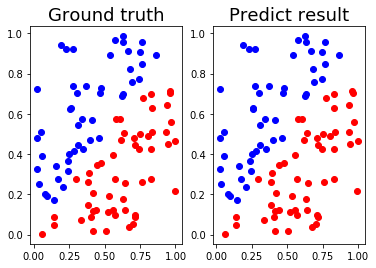

In [7]:
#把線性資料的訓練結果show出來
show_result(x1,y1,NN1.forward(x1))

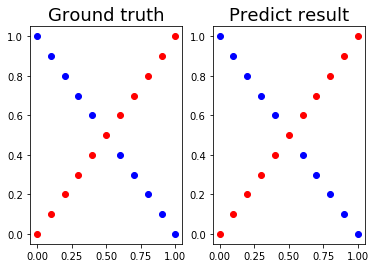

In [9]:
#把XOR資料的訓練結果show出來
show_result(x2,y2,NN2.forward(x2))

In [10]:
print ("The accuracy rate of linear dataset is: "+ str(accuracy(NN1.forward(x1), y1, 100)))

The accuracy rate of linear dataset is: 0.9991755815805862


In [11]:
print ("The accuracy rate of XOR dataset is: "+ str(accuracy(NN2.forward(x2), y2, 100)))

The accuracy rate of XOR dataset is: 0.9989717130189352
